<a href="https://colab.research.google.com/github/EmilSeyfullayev/Mercedes/blob/main/3_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import auth
# auth.authenticate_user()

In [ ]:
# !cat adc.json

In [ ]:
!pip install -U -q PyDrive

import httplib2
import json

from google.colab import auth
from oauth2client import GOOGLE_REVOKE_URI, GOOGLE_TOKEN_URI, client
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

auth_key = {
  "client_id": "32555940559.apps.googleusercontent.com",
  "client_secret": "ZmssLNjJy2998hD4CTg2ejr2",
  "refresh_token": "1//09eejwl_7oKeSCgYIARAAGAkSNwF-L9IrdplxxE_hKdmbz65GQ7qhqvAfih3jYLopxdZVb7YltF9vjXOi-TyeLTJetDlgv3y0nSE"
}

credentials = client.OAuth2Credentials(
    access_token=None,
    client_id=auth_key['client_id'],
    client_secret=auth_key['client_secret'],
    refresh_token=auth_key['refresh_token'],
    token_expiry=None,
    token_uri=GOOGLE_TOKEN_URI,
    user_agent=None,
    revoke_uri=GOOGLE_REVOKE_URI)

credentials.refresh(httplib2.Http())
credentials.authorize(httplib2.Http())
cred = json.loads(credentials.to_json())
cred['type'] = 'authorized_user'

with open('adc.json', 'w') as outfile:
  json.dump(cred, outfile)

auth.authenticate_user()

In [ ]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

import gspread_dataframe as gd
import gspread as gs
gc = gs.authorize(GoogleCredentials.get_application_default())

ws = gc.open("MercedesDataBase").worksheet("sheet_1")
db_data = gd.get_as_dataframe(ws)


data = db_data

##Preprocessing
df = pd.DataFrame()

#1 #2
df['city'] = data['Şəhər']
df['car_name'] = data['Marka']

#3
model_1 = []
model_2 = []
model_3 = []

for i in data['Model']:
  model_1.append(str(i).split(" ")[0])

  try:
    model_2.append(str(i).split(" ")[1])
  except IndexError:
    model_2.append(0)

  try:
    model_3.append(str(i).split(" ")[2])
  except IndexError:
    model_3.append(0)

df['model_1'] = model_1
df['model_2'] = model_2
df['model_3'] = model_3


#4, 5, 6
df['year'] = pd.to_numeric(data['Buraxılış ili'])
df['car_type'] = data['Ban növü']
df['color'] = data['Rəng']


#7
engine_volume = []

for i in data['Mühərrik']:
  engine_volume.append(str(i).split(" L")[0])

df['engine_volume'] = pd.to_numeric(engine_volume)

#8
horse_power = []

for i in data['Mühərrikin gücü']:
  horse_power.append(str(i).split(" a.g.")[0])

df['horse_power'] = pd.to_numeric(horse_power)

#9
df['fuel_type'] = data['Yanacaq növü']

#10
went = []

for i in data['Yürüş']:
  went.append(str(i).split(" km")[0].replace(" ", ""))

df['went'] = pd.to_numeric(went)

#11 #12 #13
df['gearbox'] = data['Sürətlər qutusu']
df['transmission'] = data['Ötürücü']
df['new'] = data['Yeni']

#14 #15
currency = []
price = []

for i in data['Qiymət']:
  if str(i).split(" ")[-1] in ["AZN", "$"]:
    currency.append(str(i).split(" ")[-1])
  elif str(i).split(" ")[-1] not in ["AZN", "$"]:
    currency.append("€")

for i in data['Qiymət']:
  if str(i).split(" ")[-1] in ["AZN", "$"]:
    price.append("".join(str(i).split(" ")[0:-1]))
  elif str(i).split(" ")[-1] not in ["AZN", "$"]:
    price.append(i)

df['currency'] = currency
df['price'] = pd.to_numeric(price)

#16

date = []
time_hour = []
time_minute = []

for i in data['Tarix_Saat']:
  date.append(i.split(" ")[0])
  time_hour.append(str(i).split(" ")[1].split(":")[0])
  time_minute.append(str(i).split(" ")[1].split(":")[1])

df['date'] = pd.to_datetime(date, format="%d.%m.%Y" )
df['time_hour'] = pd.to_numeric(time_hour)
df['time_minute'] = pd.to_numeric(time_minute)

#17

values = ['products-i', 'vipped', 'featured', 'salon']

vip = []
featured = []
salon = []

for value in data['Kateqoriya']:
#########################################
  if values[1] in value:
    vip.append(1)
  elif values[1] not in value:
    vip.append(0)
########################################
for value in data['Kateqoriya']:
  if values[2] in value:
    featured.append(1)
  elif values[2] not in value:
    featured.append(0)
########################################
for value in data['Kateqoriya']:
  if values[3] in value:
    salon.append(1)
  elif values[3] not in value:
    salon.append(0)

df['vip'] = vip
df['featured'] = featured
df['salon'] = salon

#18 #19 #20 #21 #22
df['number_of-looks'] = pd.to_numeric(data['Baxışların sayı'])
df['id'] = pd.to_numeric(data['Məhsulun id-si'])
df['link'] = data['Link']
df['loan'] = data['Kredit mümkündür']
df['barter'] = data['Barter mümkündür']

#23 #24
# this one is tricky
#length of one string element (1 number is 15)
#lrngth of others (2 and more number counts) is roughly equals or less than 4 (4 numbers)

cell_phone_number = []

for i in data['Əlaqə nömrəsi']:
  if len(str(i)) > 14:
    cell_phone_number.append(i)
  else:
    cell_phone_number.append(", ".join(str(i)))

df['cell_phone_number'] = cell_phone_number
df['name_of_auto_salon'] = data['Avtosalon adı']

#25
extra_values = ['Yüngül lehimli disklər',
 'ABS', 'Lyuk', 'Yağış sensoru', 'Mərkəzi qapanma',
 'Park radarı', 'Kondisioner', 'Oturacaqların isidilməsi',
 'Dəri salon', 'Ksenon lampalar', 'Arxa görüntü kamerası',
 'Yan pərdələr', 'Oturacaqların ventilyasiyası']

alloy_wheels = [];    abs_auto_block = [];        luke = []
rain_sensors = [];    central_door_blocking = []; parking_radars = []
air_conditioner = []; seat_heating = [];          leather_interior = []
xenon_lights = [];    back_side_camera = [];      side_curtains = []
seat_ventilation = []

for i in data['Ekstra parametrlər']:
####disks
  if extra_values[0] in str(i):
    alloy_wheels.append(1)
  elif extra_values[0] not in str(i):
    alloy_wheels.append(0)

####abs
  if extra_values[1] in str(i):
    abs_auto_block.append(1)
  elif extra_values[1] not in str(i):
    abs_auto_block.append(0)


####luke
  if extra_values[2] in str(i):
    luke.append(1)
  elif extra_values[2] not in str(i):
    luke.append(0)

#rain_sensors
  if extra_values[3] in str(i):
    rain_sensors.append(1)
  elif extra_values[3] not in str(i):
    rain_sensors.append(0)

#central_door_blocking
  if extra_values[4] in str(i):
    central_door_blocking.append(1)
  elif extra_values[4] not in str(i):
    central_door_blocking.append(0)

#parking_radars
  if extra_values[5] in str(i):
    parking_radars.append(1)
  elif extra_values[5] not in str(i):
    parking_radars.append(0)

#air_conditioner
  if extra_values[6] in str(i):
    air_conditioner.append(1)
  elif extra_values[6] not in str(i):
    air_conditioner.append(0)

#seat_heating
  if extra_values[7] in str(i):
    seat_heating.append(1)
  elif extra_values[7] not in str(i):
    seat_heating.append(0)

#leather_interior
  if extra_values[8] in str(i):
    leather_interior.append(1)
  elif extra_values[8] not in str(i):
    leather_interior.append(0)

#xenon_lights
  if extra_values[9] in str(i):
    xenon_lights.append(1)
  elif extra_values[9] not in str(i):
    xenon_lights.append(0)

#back_side_camera
  if extra_values[10] in str(i):
    back_side_camera.append(1)
  elif extra_values[10] not in str(i):
    back_side_camera.append(0)

#side_curtains
  if extra_values[11] in str(i):
    side_curtains.append(1)
  elif extra_values[11] not in str(i):
    side_curtains.append(0)

#seat_ventilation
  if extra_values[12] in str(i):
    seat_ventilation.append(1)
  elif extra_values[12] not in str(i):
    seat_ventilation.append(0)


df['alloy_wheels'] = alloy_wheels;                        df['abs_auto_block'] = abs_auto_block
df['luke'] = luke;                                        df['rain_sensors'] = rain_sensors
df['central_door_blocking'] = central_door_blocking;      df['parking_radars'] = parking_radars
df['air_conditioner'] = air_conditioner;                  df['seat_heating'] = seat_heating
df['leather_interior'] = leather_interior;                df['xenon_lights'] = xenon_lights
df['back_side_camera'] = back_side_camera;                df['side_curtains'] = side_curtains
df['seat_ventilation'] = seat_ventilation

#26
df['product_text'] = data['Məhsulun mətni']

# if any(s in line for s in ('string1', 'string2', ...)): # this is to check words in text by keywords

#27
geolocation_horizontal = []
geolocation_vertical = []

for i in data['Yerləşmə məkanı']:
  try:
    geolocation_horizontal.append(float(i.split("%2C")[0]))
    geolocation_vertical.append(float(i.split("%2C")[1]))
  except AttributeError:
    geolocation_horizontal.append(i)
    geolocation_vertical.append(i)   

df['geolocation_horizontal'] = geolocation_horizontal
df['geolocation_vertical'] = geolocation_vertical

#28 #29
df['parsing_date'] = data['Parsinq olunan tarix']
df['parsing_exact_time'] = data['Parsinq olunan zaman']

price_manat_2021 = []

for i in range(len(df)):
  if df['currency'][i] == 'AZN':
    price_manat_2021.append(df['price'][i])
  elif df['currency'][i] == '$':
    price_manat_2021.append(df['price'][i]*1.7)
  elif df['currency'][i] == '€':
    price_manat_2021.append(df['price'][i]*2)
  else:
    price_manat_2021.append(0)

df['price_manat_2021'] = price_manat_2021

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30877 entries, 0 to 30876
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    30877 non-null  object        
 1   car_name                30877 non-null  object        
 2   model_1                 30877 non-null  object        
 3   model_2                 30877 non-null  object        
 4   model_3                 30877 non-null  object        
 5   year                    30877 non-null  int64         
 6   car_type                30877 non-null  object        
 7   color                   30877 non-null  object        
 8   engine_volume           30877 non-null  float64       
 9   horse_power             30877 non-null  int64         
 10  fuel_type               30877 non-null  object        
 11  went                    30877 non-null  int64         
 12  gearbox                 30877 non-null  object

In [ ]:
##Some data on cars was parsed as zeros, because they were duplicates in site, so, they should be dropped
print("Length of data to be dropped is: " + str(len(df[df['car_type']==0])))
df = df[df['car_type']!=0]
df.reset_index(inplace=True)

Length of data to be dropped is: 8


In [ ]:
df['currency'].value_counts()

AZN    27283
$       3536
€         50
Name: currency, dtype: int64

In [ ]:
df.to_excel("mercedes.xlsx")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


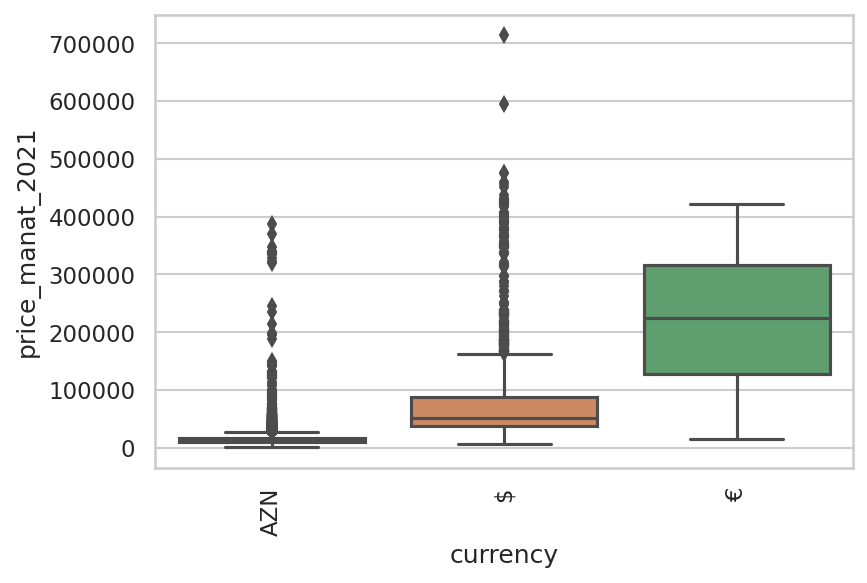

In [ ]:
plt.figure(dpi=150)
plt.xticks(rotation=90)
sns.boxplot(df['currency'], df['price_manat_2021'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


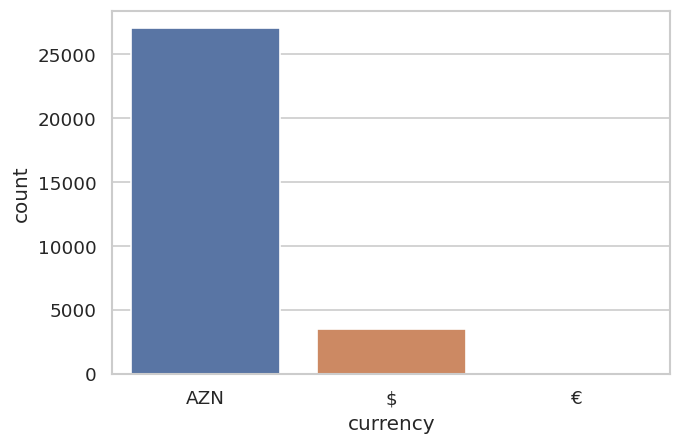

In [ ]:
plt.figure(dpi=120)
sns.countplot(df['currency'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


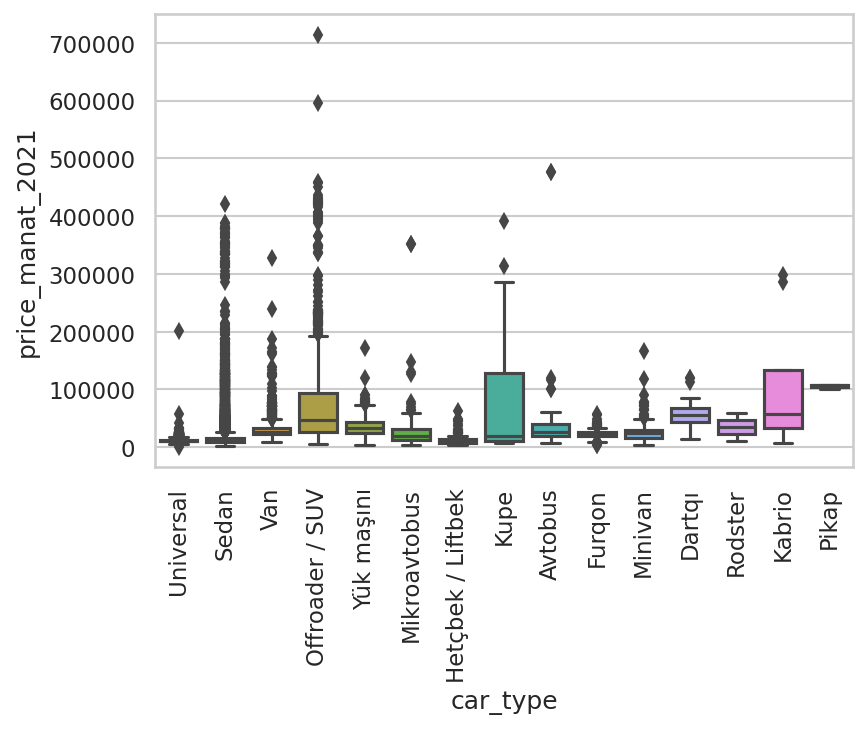

In [ ]:
plt.figure(dpi=150)
plt.xticks(rotation=90)
sns.boxplot(df['car_type'], df['price_manat_2021'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


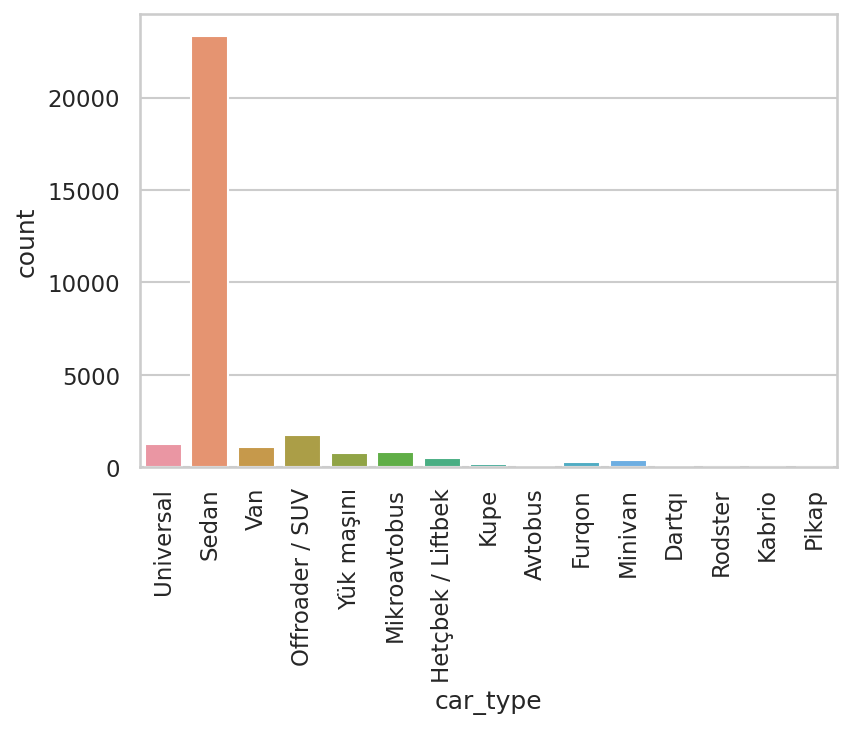

In [ ]:
plt.figure(dpi=150)
plt.xticks(rotation=90)
sns.countplot(df['car_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


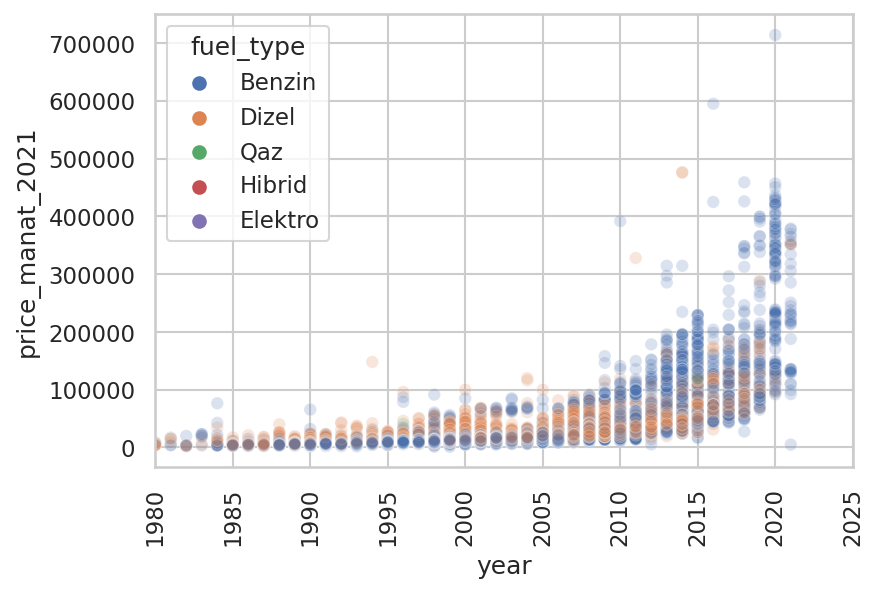

In [ ]:
plt.figure(dpi=150)
plt.xticks(rotation=90)
plt.xlim(left=1980, right=2025)
sns.scatterplot(df['year'], df['price_manat_2021'], alpha=0.2, hue=df['fuel_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


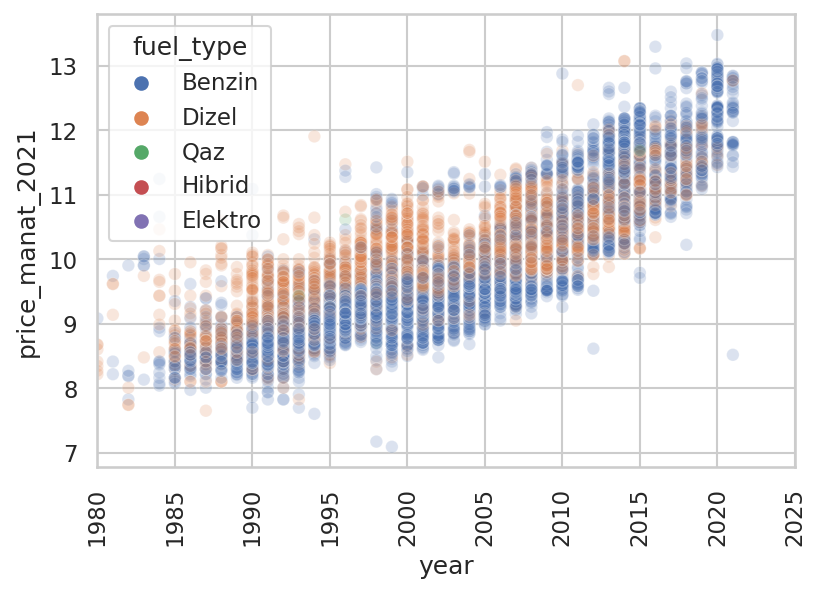

In [ ]:
plt.figure(dpi=150)
plt.xticks(rotation=90)
plt.xlim(left=1980, right=2025)
sns.scatterplot(df['year'], np.log(df['price_manat_2021']), alpha=0.2, hue=df['fuel_type'])

In [ ]:
df.iloc[100:200, :]

,index,city,car_name,model_1,model_2,model_3,year,car_type,color,engine_volume,horse_power,fuel_type,went,gearbox,transmission,new,currency,price,date,time_hour,time_minute,vip,featured,salon,number_of-looks,id,link,loan,barter,cell_phone_number,name_of_auto_salon,alloy_wheels,abs_auto_block,luke,rain_sensors,central_door_blocking,parking_radars,air_conditioner,seat_heating,leather_interior,xenon_lights,back_side_camera,side_curtains,seat_ventilation,product_text,geolocation_horizontal,geolocation_vertical,parsing_date,parsing_exact_time,price_manat_2021
100,100,Bakı,Mercedes,E,220,0,2002,Sedan,Ağ,2.2,143,Dizel,357496,Avtomat,Arxa,Xeyr,AZN,18900,2021-02-03,13,11,0,0,0,3871,4633976,https://turbo.az//autos/4633976-mercedes-e-220,1,1,(055) 886-02-94,0,1,0,1,1,1,0,1,1,0,1,1,1,1,salam mawin yaxwi veziyededir udarsiz mawindi ...,0.000000,0.000000,17:54:24,2021-02-06,18900.0
101,101,Bakı,Mercedes,C,180,0,1995,Sedan,Qara,1.8,122,Benzin,438299,Avtomat,Arxa,Xeyr,AZN,8600,2021-01-09,0,24,0,0,0,747,4633724,https://turbo.az//autos/4633724-mercedes-c-180,0,0,(050) 318-73-61,0,1,1,0,0,1,0,1,1,1,0,0,0,0,Mashin yaxshi veziyyetdedi . Gundelik surulen ...,0.000000,0.000000,17:54:23,2021-02-06,8600.0
102,102,Bakı,Mercedes,C,250,0,2007,Sedan,Gümüşü,2.5,204,Benzin,250000,Avtomat,Arxa,Xeyr,AZN,14800,2021-01-07,22,45,0,0,0,1414,4634062,https://turbo.az//autos/4634062-mercedes-c-250,0,0,(051) 433-73-73,0,1,1,1,1,1,1,1,1,1,1,0,1,1,Masin yaxsi veziyyetdedir. Xaiw olunur real we...,0.000000,0.000000,17:54:21,2021-02-06,14800.0
103,103,Lənkəran,Mercedes,CLK,200,0,2000,Kupe,Gümüşü,2.0,136,Benzin,341000,Avtomat,Tam,Xeyr,AZN,10500,2021-01-07,22,49,0,0,0,2058,4634077,https://turbo.az//autos/4634077-mercedes-clk-200,0,0,(077) 600-10-06,0,1,1,1,1,1,1,1,1,1,1,1,1,1,mercedes clk 200,0.000000,0.000000,17:54:20,2021-02-06,10500.0
104,104,Bakı,Mercedes,E,350,0,2011,Sedan,Qara,3.5,272,Benzin,172000,Avtomat,Arxa,Xeyr,$,22500,2021-01-07,22,49,0,0,0,1792,4634018,https://turbo.az//autos/4634018-mercedes-e-350,0,0,(050) 600-00-70,0,1,1,1,1,1,1,1,1,1,1,1,0,1,Ev maşını olub. Vaxtı vaxtında qulluq olunub ....,0.000000,0.000000,17:54:19,2021-02-06,38250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Bakı,Mercedes,E,220,0,1995,Sedan,Gümüşü,2.2,146,Benzin,260000,Avtomat,Arxa,Xeyr,AZN,8900,2021-01-08,15,35,0,0,0,1253,4635825,https://turbo.az//autos/4635825-mercedes-e-220,0,1,(070) 976-76-61,0,1,1,1,0,1,0,1,1,0,1,0,0,0,Maşın ideal vəziyyətdədir. Start-stopa qədər v...,0.000000,0.000000,17:52:18,2021-02-06,8900.0
196,196,Bakı,Mercedes,Vito,116,0,2011,Van,Ağ,2.2,163,Dizel,340000,Avtomat,Ön,Xeyr,$,20500,2021-01-08,16,3,0,0,0,580,4635965,https://turbo.az//autos/4635965-mercedes-vito-116,0,0,(055) 222-68-68,0,1,1,0,1,1,1,1,0,1,0,1,1,0,2 ildir Bakidadir. Holladiyadan alinib. Ela ve...,0.000000,0.000000,17:52:17,2021-02-06,34850.0
197,197,Bakı,Mercedes,G,63,AMG,2013,Offroader / SUV,Qara,5.5,544,Benzin,28000,Avtomat,Tam,Xeyr,$,108000,2021-01-27,13,58,0,0,1,11994,3356147,https://turbo.az//autos/3356147-mercedes-g-63-amg,0,0,"['(050) 620-66-66', '(012) 430-85-55']","Avtosalon ""BRABUS and STARTECH Baku""",1,1,1,1,1,1,1,1,1,1,1,1,1,Avtomobil ideal vaziyyetdadir.Orijinal yurush....,40.408349,49.804436,17:52:15,2021-02-06,183600.0
198,198,Bakı,Mercedes,V,220,0,2019,Van,Qara,2.2,170,Dizel,0,Avtomat,Arxa,Bəli,$,75000,2021-01-08,15,55,0,0,1,8248,4198961,https://turbo.az//autos/4198961-mercedes-v-220,0,0,"['(050) 620-66-66', '(012) 430-85-55']","Avtosalon ""BRABUS and STARTECH Baku""",1,1,0,1,1,1,1,0,1,1,1,0,0,"V-klass 2019,7+1 yerlik.Kredit mumkundu 30%ilk...",40.408349,49.804436,17:52:14,2021-02-06,127500.0


In [ ]:
# ## This cell establishes connection with sqliteDB, deletes all rows and writes new from the google sheets
# import sqlite3
# connection = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/GeneralParser/MercedesDataBase.db')
# cursor = connection.cursor()
# cursor.execute(
#     '''
#     DELETE FROM DataBasePrimaryTable;
#     '''
# )
# connection.commit()
# df.to_sql('DataBasePrimaryTable', connection, if_exists="replace", index=False)
# data = pd.read_sql(
#     'select * from DataBasePrimaryTable', 
#     connection
# )

In [ ]:
df.head(1)

,index,city,car_name,model_1,model_2,model_3,year,car_type,color,engine_volume,horse_power,fuel_type,went,gearbox,transmission,new,currency,price,date,time_hour,time_minute,vip,featured,salon,number_of-looks,id,link,loan,barter,cell_phone_number,name_of_auto_salon,alloy_wheels,abs_auto_block,luke,rain_sensors,central_door_blocking,parking_radars,air_conditioner,seat_heating,leather_interior,xenon_lights,back_side_camera,side_curtains,seat_ventilation,product_text,geolocation_horizontal,geolocation_vertical,parsing_date,parsing_exact_time,price_manat_2021
0,0,Mingəçevir,Mercedes,C,180,0,1999,Universal,Göy,1.8,122,Benzin,263000,Mexaniki,Arxa,Xeyr,AZN,9600,2021-01-07,13,50,0,0,0,1400,4631537,https://turbo.az//autos/4631537-mercedes-c-180,0,0,"[, ]",0,1,1,0,1,1,1,1,0,0,0,1,0,0,Masinin heç bir vuruģu udarı yoxdur.Tam ela ve...,0.0,0.0,17:56:39,2021-02-06,9600.0


In [ ]:
df1 = df.drop(['link', 'cell_phone_number', 'product_text', 'id', 'price', 'name_of_auto_salon', 'index', 'parsing_date', 'parsing_exact_time'], axis=1)
df1.drop(['date', 'time_hour', 'time_minute'], axis=1, inplace=True)
df1.drop(['model_2', 'model_3'], axis=1, inplace=True)
df1.drop(['color', 'city'], axis=1, inplace=True)

In [ ]:
df1.head(1)

,car_name,model_1,year,car_type,engine_volume,horse_power,fuel_type,went,gearbox,transmission,new,currency,vip,featured,salon,number_of-looks,loan,barter,alloy_wheels,abs_auto_block,luke,rain_sensors,central_door_blocking,parking_radars,air_conditioner,seat_heating,leather_interior,xenon_lights,back_side_camera,side_curtains,seat_ventilation,geolocation_horizontal,geolocation_vertical,price_manat_2021
0,Mercedes,C,1999,Universal,1.8,122,Benzin,263000,Mexaniki,Arxa,Xeyr,AZN,0,0,0,1400,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0.0,0.0,9600.0


In [ ]:
df1_dummies = pd.get_dummies(df1, drop_first=True)

In [ ]:
df1_dummies.head(1)

,year,engine_volume,horse_power,went,vip,featured,salon,number_of-looks,loan,barter,alloy_wheels,abs_auto_block,luke,rain_sensors,central_door_blocking,parking_radars,air_conditioner,seat_heating,leather_interior,xenon_lights,back_side_camera,side_curtains,seat_ventilation,geolocation_horizontal,geolocation_vertical,price_manat_2021,model_1_1117,model_1_1217,model_1_1222,model_1_1320,model_1_190,model_1_200,model_1_207,model_1_208,model_1_210,model_1_220,model_1_230,model_1_250,model_1_260,model_1_280,...,model_1_Metris,model_1_R,model_1_S,model_1_SL,model_1_SLK,model_1_SLS,model_1_Sprinter,model_1_Travego,model_1_V,model_1_Vaneo,model_1_Vario,model_1_Viano,model_1_Vito,model_1_X,car_type_Dartqı,car_type_Furqon,car_type_Hetçbek / Liftbek,car_type_Kabrio,car_type_Kupe,car_type_Mikroavtobus,car_type_Minivan,car_type_Offroader / SUV,car_type_Pikap,car_type_Rodster,car_type_Sedan,car_type_Universal,car_type_Van,car_type_Yük maşını,fuel_type_Dizel,fuel_type_Elektro,fuel_type_Hibrid,fuel_type_Qaz,gearbox_Mexaniki,gearbox_Robotlaşdırılmış,gearbox_Variator,transmission_Tam,transmission_Ön,new_Xeyr,currency_AZN,currency_€
0,1999,1.8,122,263000,0,0,0,1400,0,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0.0,0.0,9600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [ ]:
# for i in df1_dummies.columns:
#   print(i)

In [ ]:
df2 = df[['year','went', 'car_type', 'model_1', 'price_manat_2021']]

In [ ]:
df2_with_dummies = pd.get_dummies(df2, drop_first=True)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=0.2, include_bias=False)

In [ ]:
x_poly = poly.fit_transform(df2_with_dummies.drop(['price_manat_2021'], axis=1))

In [ ]:
#x_poly = poly.fit_transform(df2.drop(['price_manat_2021'], axis=1))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X = df2_with_dummies.drop('price_manat_2021', axis=1)
# y = df2_with_dummies['price_manat_2021']
X = x_poly
y = df2['price_manat_2021']

In [ ]:
#X = np.array(X).reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(X_test, y_test)

0.6412954199333892

In [ ]:
y_pred = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


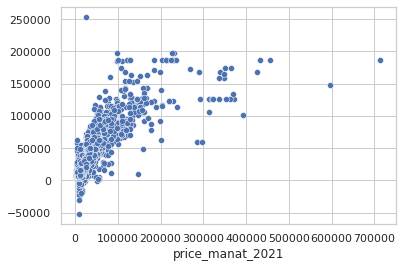

In [ ]:
sns.scatterplot(y_test, y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

7758.918385465422

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(mse)

20200.78648285302

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


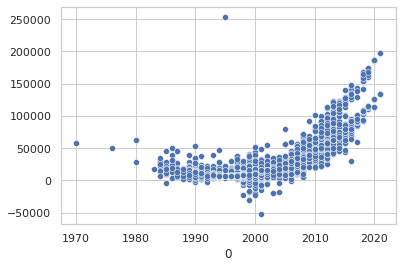

In [ ]:
sns.scatterplot(pd.DataFrame(X_test)[0], y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


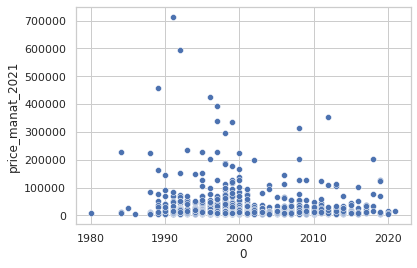

In [ ]:
sns.scatterplot(pd.DataFrame(X_test)[0], y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


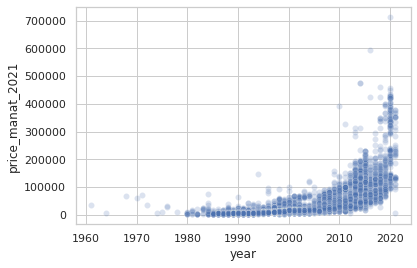

In [ ]:
sns.scatterplot(df['year'], df['price_manat_2021'], alpha=0.2)

In [ ]:
df3 = df[['year','went', 'car_type', 'price_manat_2021']]

In [ ]:
df3['price_manat_2021'] = np.log(df['price_manat_2021'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3_with_dummies = pd.get_dummies(df3, drop_first=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


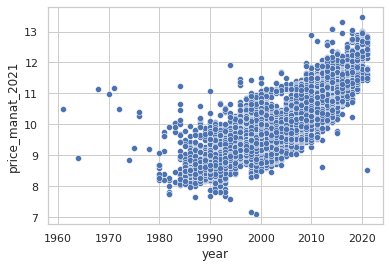

In [ ]:
sns.scatterplot(df3['year'], df3['price_manat_2021'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3_with_dummies.drop('price_manat_2021', axis=1), df3['price_manat_2021'], test_size=0.33, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.score(X_test, y_test)

0.8467770352261594

In [ ]:
y_pred = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


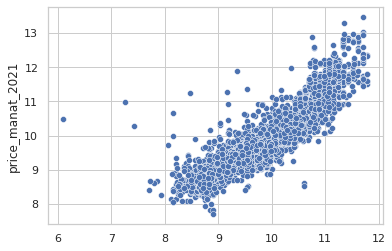

In [ ]:
sns.scatterplot(y_pred, y_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, np.exp(y_pred)))

22512.63538737699

In [ ]:
mean_absolute_error(y_test, np.exp(y_pred))

6080.443032318942

In [ ]:
!apt-get install default-jre
!java -version
!pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
     |████████████████████████████████| 164.8MB 90kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=7cf4c50b6c580ca54aad128ff02a5948df354511d1cae55e9d3d1e0c0d0cf63d
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4vu5pjfx
  JVM stdout: /tmp/tmp4vu5pjfx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4vu5pjfx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,"14 days, 19 hours and 10 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_23kjfg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
df.to_csv('df.csv')

In [ ]:
df = h2o.import_file('df.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
df_train, df_test, df_validation = df.split_frame([.7, .15])

In [ ]:
y = 'price_manat_2021'
x = df.columns
x.remove('index')
x.remove('link')
x.remove('cell_phone_number')
x.remove('product_text')
x.remove('id')
x.remove('price')
x.remove("C1")
x.remove("name_of_auto_salon")

In [ ]:
x

['city',
 'car_name',
 'model_1',
 'model_2',
 'model_3',
 'year',
 'car_type',
 'color',
 'engine_volume',
 'horse_power',
 'fuel_type',
 'went',
 'gearbox',
 'transmission',
 'new',
 'currency',
 'date',
 'time_hour',
 'time_minute',
 'vip',
 'featured',
 'salon',
 'number_of-looks',
 'loan',
 'barter',
 'alloy_wheels',
 'abs_auto_block',
 'luke',
 'rain_sensors',
 'central_door_blocking',
 'parking_radars',
 'air_conditioner',
 'seat_heating',
 'leather_interior',
 'xenon_lights',
 'back_side_camera',
 'side_curtains',
 'seat_ventilation',
 'geolocation_horizontal',
 'geolocation_vertical',
 'parsing_date',
 'parsing_exact_time',
 'price_manat_2021']

In [ ]:
aml = H2OAutoML(
    nfolds=0,
    balance_classes=True,
    max_runtime_secs=2400,
    seed=42,
    stopping_metric="RMSE"
)

In [ ]:
aml.train(x,y,training_frame=df_train, validation_frame=df_validation)

AutoML progress: |
14:15:49.631: XGBoost_1_AutoML_20210409_141547 [XGBoost def_1] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_1_AutoML_20210409_141547.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


█
14:15:50.637: XGBoost_2_AutoML_20210409_141547 [XGBoost def_2] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_2_AutoML_20210409_141547.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.

14:15:50.646: XGBoost_3_AutoML_20210409_141547 [XGBoost def_3] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for XGBoost model: XGBoost_3_AutoML_20210409_141547.  Details: ERRR on field: _response_column: Response contains missing values (NAs) - not supported by XGBoost.


████████████████████
14:16:55.403: Dee

In [ ]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid__1_AutoML_20210409_141547_model_44,2.23569e+07,4728.31,2.23569e+07,2009.43,0.146119
GBM_grid__1_AutoML_20210409_141547_model_32,2.27384e+07,4768.48,2.27384e+07,2160.47,0.15343
GBM_grid__1_AutoML_20210409_141547_model_60,2.42885e+07,4928.33,2.42885e+07,2121.35,0.15078
GBM_grid__1_AutoML_20210409_141547_model_11,2.45669e+07,4956.5,2.45669e+07,2142.16,0.152089
GBM_grid__1_AutoML_20210409_141547_model_52,2.46976e+07,4969.66,2.46976e+07,2130.02,0.152484
GBM_grid__1_AutoML_20210409_141547_model_54,2.50581e+07,5005.81,2.50581e+07,2049.04,0.151629
GBM_1_AutoML_20210409_141547,2.59719e+07,5096.26,2.59719e+07,2198.61,0.15673
GBM_grid__1_AutoML_20210409_141547_model_80,2.59989e+07,5098.91,2.59989e+07,2228.33,0.15875
GBM_grid__1_AutoML_20210409_141547_model_48,2.60162e+07,5100.6,2.60162e+07,2203.94,0.156701
GBM_grid__1_AutoML_20210409_141547_model_31,2.64203e+07,5140.07,2.64203e+07,2094.38,0.150473


In [ ]:
aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210409_141547_model_44


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,60.0,60.0,497747.0,11.0,11.0,11.0,254.0,773.0,568.68335




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1409683.8158960165
RMSE: 1187.3010637138402
MAE: 867.9162827441176
RMSLE: 0.08676928899477099
Mean Residual Deviance: 1409683.8158960165

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 76872971.13498636
RMSE: 8767.723258348564
MAE: 2365.8766786588403
RMSLE: 0.1660101340948871
Mean Residual Deviance: 76872971.13498636

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-04-09 14:37:02,4 min 30.457 sec,0.0,32703.164904,15799.696057,1.069497e+09,32414.567683,15793.486798,1.050704e+09
1,,2021-04-09 14:37:03,4 min 31.114 sec,5.0,19718.879100,9451.322399,3.888342e+08,20854.479913,9573.672806,4.349093e+08
2,,2021-04-09 14:37:04,4 min 31.845 sec,10.0,11938.360798,5722.600596,1.425245e+08,14462.373656,6009.163457,2.091603e+08
3,,2021-04-09 14:37:04,4 min 32.406 sec,15.0,7364.366975,3572.574564,5.423390e+07,11310.791465,4066.154564,1.279340e+08
4,,2021-04-09 14:37:05,4 min 32.981 sec,20.0,4781.363135,2381.224108,2.286143e+07,10047.831415,3112.603937,1.009589e+08
5,,2021-04-09 14:37:05,4 min 33.533 sec,25.0,3217.407150,1722.236253,1.035171e+07,9261.413734,2652.561299,8.577378e+07
6,,2021-04-09 14:37:06,4 min 34.081 sec,30.0,2335.242161,1373.245808,5.453356e+06,9005.868100,2478.786060,8.110566e+07
7,,2021-04-09 14:37:06,4 min 34.614 sec,35.0,1859.449511,1183.568623,3.457552e+06,8902.677770,2413.290441,7.925767e+07
8,,2021-04-09 14:37:07,4 min 35.284 sec,40.0,1588.130472,1070.619149,2.522158e+06,8812.157515,2388.281270,7.765412e+07
9,,2021-04-09 14:37:08,4 min 35.987 sec,45.0,1419.030906,995.814902,2.013649e+06,8784.249951,2375.193863,7.716305e+07



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,year,4.677076e+13,1.000000,0.657194
1,model_1,1.547349e+13,0.330837,0.217424
2,new,2.468436e+12,0.052777,0.034685
3,horse_power,1.887969e+12,0.040366,0.026529
4,went,1.507718e+12,0.032236,0.021186
5,model_2,6.182444e+11,0.013219,0.008687
6,car_type,3.083787e+11,0.006593,0.004333
7,currency,2.879373e+11,0.006156,0.004046
8,engine_volume,2.797159e+11,0.005981,0.003930
9,color,2.383468e+11,0.005096,0.003349



See the whole table with table.as_data_frame()
